In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("focus.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
1,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
2,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
3,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0


* model : Araba Modeli (Bu datasette sadece Ford Focus var)
* year : Araba Yili
* transmission : Vites Türü 
* mileage : Kilometre ya da mil (Eğer mil türünde ise km ye çevireceğiz)
* fuelType : Yakıt Türü
* tax : Vergi
* mpg : (Miles Per Galon) (Galon Başı Mil) (Amerika birimleri) bizim birimlerimize çevireceğiz 
* engineSize : Motor Boyutu 

### **Veri Hakkinda**

In [4]:
len(df) 

4589

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4589 non-null   object 
 1   year          4589 non-null   int64  
 2   price         4589 non-null   int64  
 3   transmission  4589 non-null   object 
 4   mileage       4589 non-null   int64  
 5   fuelType      4589 non-null   object 
 6   tax           4589 non-null   int64  
 7   mpg           4589 non-null   float64
 8   engineSize    4589 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 322.8+ KB


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000,4589.000000
mean,2016.996731,13184.818043,23731.193288,111.136849,60.088865,1.361342
std,2.097916,4509.851628,20501.778343,63.640874,10.732258,0.396201
min,2003.000000,495.000000,1.000000,0.000000,26.300000,0.000000
25%,2016.000000,10099.000000,9694.000000,20.000000,55.400000,1.000000
50%,2017.000000,12790.000000,17339.000000,145.000000,60.100000,1.500000
75%,2018.000000,16500.000000,31423.000000,145.000000,67.300000,1.600000
max,2020.000000,54995.000000,177644.000000,330.000000,83.100000,2.500000


In [7]:
df.isna().sum() # Yukarıda da gördük herahangi bir null değerimiz yok 

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [8]:
# Model olarak sadece Focus bulunduğundan onu düşüreyim
df.drop("model", axis=1, inplace= True)

In [9]:
df.head(2)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2018,14000,Manual,9083,Petrol,150,57.7,1.0
1,2017,13000,Manual,12456,Petrol,150,57.7,1.0


In [10]:
1.609344 

1.609344

<Axes: ylabel='proportion'>

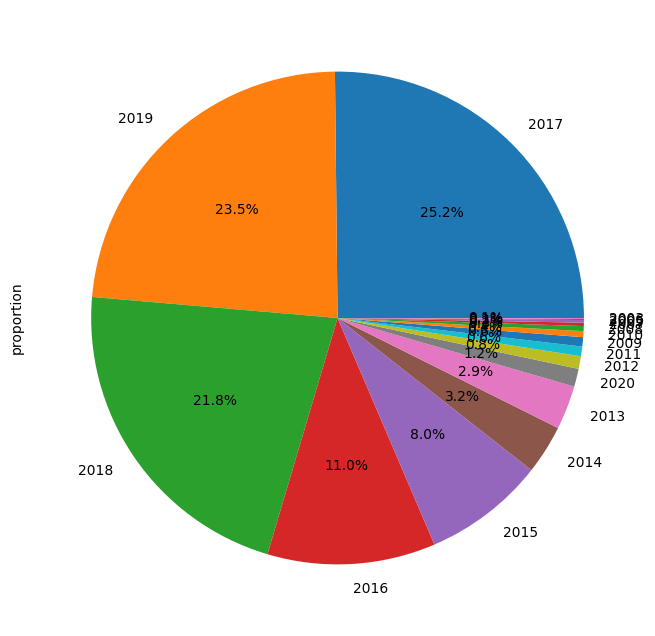

In [11]:
plt.figure(figsize=(8, 8))  # Burayı 40, 40 yaparak iç içe girmiş kısımları görüntüleyebilirsin
df.year.value_counts(normalize=True)
df.year.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")

<Axes: xlabel='year', ylabel='price'>

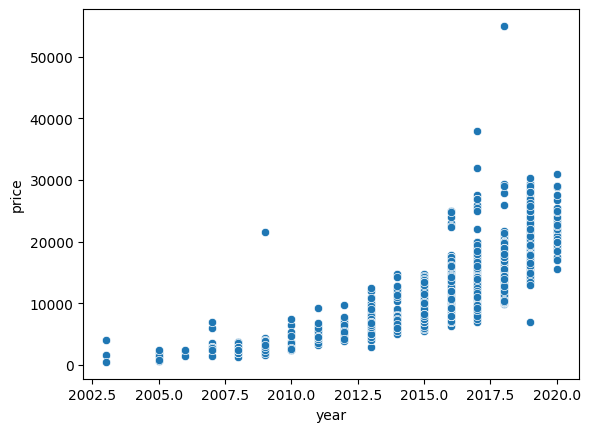

In [12]:
sns.scatterplot(x = "year", y= "price", data=df)

<Axes: xlabel='mileage', ylabel='price'>

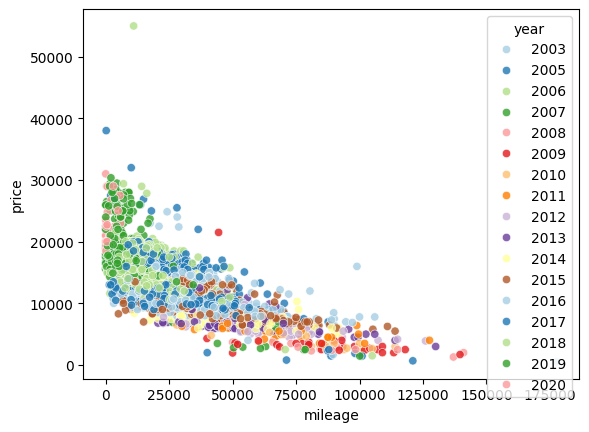

In [13]:
sns.scatterplot(x ="mileage", y="price", data=df, hue="year", palette="Paired", alpha= 0.8)

In [14]:
# Fiyatı çok yüksek olan bir araba var merak ettim bir bakalım
df[df["price"] > 50000]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3089,2018,54995,Manual,11000,Petrol,145,36.7,2.3


In [15]:
df[(df["year"] == 2018) & (df["mileage"] > 10000) & (df["mileage"] < 12000)]["price"].mean()
# Ortalama 15 bin $ olan bir arabayı 50 bin $ yazan bu arkadaşı düşürelim görmüşken boşuna uç değer olarak durmasın 

14995.40650406504

In [16]:
df.drop(index= 3089, inplace= True)

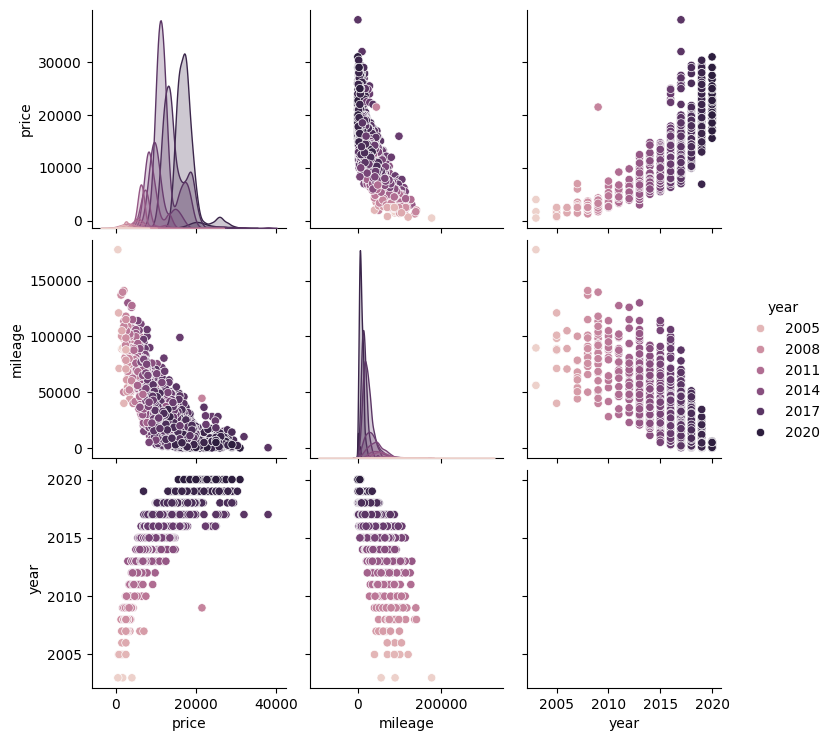

In [17]:
# son olarak pairplot
sns.pairplot(data=df,vars=["price", "mileage", "year"], hue="year")

In [18]:
# Sütun isimlerini yukarıda açıkladım değiştirmeyeceğim ama içindeki verilerimizi bizim birimlerimize çevirelim ki daha anlaşılır olsun tekrardan bir bakalım neleri değiştireceğiz

df.head(3)

# 1 - Price : $ -> TL
# 2 - mileage : mil -> km
# 3 - tax : $ -> TL
# 4 - mpg -> lpkm (litre per km)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2018,14000,Manual,9083,Petrol,150,57.7,1.0
1,2017,13000,Manual,12456,Petrol,150,57.7,1.0
2,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [19]:
df["price"] = round(df["price"] * 36.23)

In [20]:
df["km"] = round(df["mileage"] * 1.609344)

In [21]:
df["tax"] = df["tax"] * 36.23

In [22]:
df["lpkm"] = round(235.215 / df["mpg"], 2)

In [23]:
df.head()
# Aşşağıdaki tabloda da görüldüğü gibi kendi birimlerimize çevirirken fazlalık durumuna gelen  mileage ve mpg sütunlarını düşüreceğiz 

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km,lpkm
0,2018,507220.0,Manual,9083,Petrol,5434.50,57.7,1.0,14618.0,4.08
1,2017,470990.0,Manual,12456,Petrol,5434.50,57.7,1.0,20046.0,4.08
2,2018,362300.0,Manual,48141,Petrol,5253.35,61.4,1.0,77475.0,3.83
3,2017,670219.0,Manual,13063,Petrol,5253.35,41.5,2.0,21023.0,5.67
4,2019,688008.0,Manual,8400,Petrol,5253.35,60.1,1.0,13518.0,3.91


In [24]:
df.drop(["mileage", "mpg"], axis=1, inplace= True)

In [25]:
df.head(2)
# Şuan veriler anlayabileceğimiz şekle geldi

,year,price,transmission,fuelType,tax,engineSize,km,lpkm
0,2018,507220.0,Manual,Petrol,5434.5,1.0,14618.0,4.08
1,2017,470990.0,Manual,Petrol,5434.5,1.0,20046.0,4.08


In [26]:
# Modelimizi oluşturmaya başlamadan modelimize henüz veremeyeceğimiz verilerimiz var bunlar transmission(vites) ve fuelType(Yakıt Türü) bunları kullanabileceğimiz şekle getireceğiz
# Dummy yöntemini kullanmayacağım 

In [27]:
df["fuelType"].unique()

array(['Petrol', 'Diesel'], dtype=object)

In [28]:
df["transmission"].unique()

array(['Manual', 'Semi-Auto', 'Automatic'], dtype=object)

In [29]:
transmisson_map = {
    "Manual" : 1,
    "Semi-Auto" : 2,
    "Automatic" : 3
    }
df["transmission"] = df["transmission"].map(transmisson_map) 
# Bu durumda 1 Düz , 2 Yarı Otomatik , 3 Otomatik vites oldu

In [30]:
fuel_map = {
    "Petrol" : 1,
    "Diesel" : 2
    }
df["fuelType"] = df["fuelType"].map(fuel_map)

In [31]:
df.iloc[1502:1505] # Değiştiler

,year,price,transmission,fuelType,tax,engineSize,km,lpkm
1502,2017,352880.0,1,2,5253.35,1.5,65706.0,3.17
1503,2017,643082.0,1,1,5253.35,2.0,11586.0,5.67
1504,2019,652865.0,3,2,5253.35,1.5,6573.0,4.41


In [32]:
# Modelimi oluşturmaya başlayayım

In [33]:
X = df.drop("price", axis=1)
y = df["price"]

#### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

### **Lineer Regresyon**

In [36]:
# Modelimiz yukarıda yazdım ama belirtmek için tekrar yazacağım

from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [38]:
# Metrikler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
print("MAE : ", round(mean_absolute_error(y_test, y_pred),2))
print("RMSE : ", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("R2 Score", round(r2_score(y_test, y_pred),2))

MAE :  48155.22
RMSE :  66049.45
R2 Score 0.81


In [40]:
df.iloc[1500:1504]

,year,price,transmission,fuelType,tax,engineSize,km,lpkm
1500,2019,924590.0,1,1,5253.35,2.3,10459.0,6.82
1501,2019,611925.0,1,2,5253.35,1.5,15994.0,3.83
1502,2017,352880.0,1,2,5253.35,1.5,65706.0,3.17
1503,2017,643082.0,1,1,5253.35,2.0,11586.0,5.67


In [41]:
# 1500. arabayı deneyelim 
araba_1 = [[2019, 1, 1, 5253, 2.3, 10450, 6.82]]
model.predict(araba_1)
# Gerçekte fiyat 924 bin modelimiz 890 bin buldu 
# Bir tane daha bakalım 

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([892498.87322548])

In [42]:
# 1501. araba
araba_2 = [[2019, 1, 2, 5253, 1.5, 15994, 3.83]]
model.predict(araba_2)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([649326.17546034])

In [43]:
# Farklı bir yerden son bir kez daha deneyelim
df.iloc[3000:3002]

,year,price,transmission,fuelType,tax,engineSize,km,lpkm
3000,2018,503561.0,1,2,5253.35,1.5,23437.0,2.91
3001,2018,499612.0,3,1,5253.35,1.0,28394.0,4.58


In [44]:
# 3001. araba
araba_3 = [[2018, 3, 1, 5253, 1, 28394, 4.58]]
model.predict(araba_3)
# Bunda yaklaşık 10 bin fark var 

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([509326.62957598])

In [ ]:
# Sonuç olarak çok iyi bir model mi ? Değil ama yine de Price (fiyat) değerlerinin yüksekliğini göz önünde bulundurunca kabul edilebilir gibi 

# Şimdi polinom regresyona bakalım 

### **Polinom Regresyon**

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

##### **En İyi Derece**

In [ ]:

for d in range(1, 6):
    poly_conv = PolynomialFeatures(degree=d)
    X_poly = poly_conv.fit_transform(X_train)  

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)

    X_test_poly = poly_conv.transform(X_test)
    y_pred = poly_model.predict(X_test_poly)  

    r2 = round(r2_score(y_test, y_pred), 2)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"Derece :{d}, R2 Score : {r2},  RMSE : {rmse} , MAE : {mae}")


Derece :1, R2 Score : 0.81,  RMSE : 66049.45 , MAE : 48155.22
Derece :2, R2 Score : 0.9,  RMSE : 46514.37 , MAE : 33461.16
Derece :3, R2 Score : 0.86,  RMSE : 56733.4 , MAE : 35950.99
Derece :4, R2 Score : 0.89,  RMSE : 48795.08 , MAE : 33505.12
Derece :5, R2 Score : 0.37,  RMSE : 119403.03 , MAE : 43749.61


In [ ]:
best_poly = PolynomialFeatures(degree= 2, include_bias= False)

In [52]:
X_poly = best_poly.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=9)

In [54]:
best_p_model = LinearRegression(fit_intercept= True)
best_p_model.fit(X_train, y_train)

LinearRegression()

In [55]:
best_p_pred = best_p_model.predict(X_test)

In [57]:
print("MAE : ", round(mean_absolute_error(y_test, best_p_pred),2))
print("RMSE : ", round(np.sqrt(mean_squared_error(y_test, best_p_pred)),2))
print("R2 Score", round(r2_score(y_test, best_p_pred),2))

MAE :  34757.8
RMSE :  46557.24
R2 Score 0.91


##### **Gerçek ve Tahmin Edilen Fiyatların Karşılaştırma Görseli**

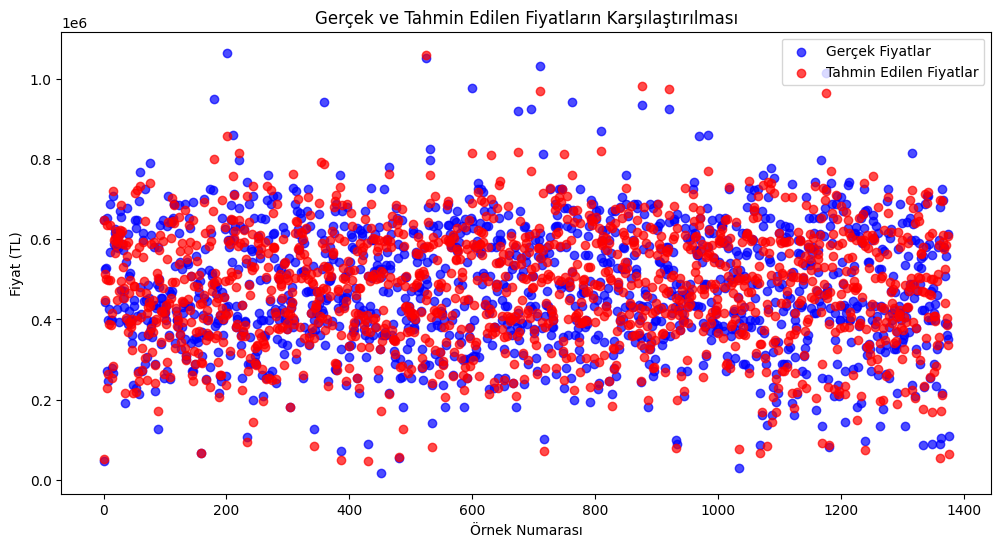

In [ ]:
plt.figure(figsize=(12,6))
# Test setindeki gerçek fiyatlar mavi renkte
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.7, label='Gerçek Fiyatlar')
# Tahmin edilen fiyatlar kırmızı renkte
plt.scatter(range(len(y_test)), best_p_pred, color='red', alpha=0.7, label='Tahmin Edilen Fiyatlar')

plt.xlabel("Örnek Numarası")
plt.ylabel("Fiyat (TL)")
plt.title("Gerçek ve Tahmin Edilen Fiyatların Karşılaştırılması")
plt.legend()
plt.show()
